In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel("D:\ProcDNA\Alox Pharma Case Study data v1.0.xlsx")

In [6]:
df.head(10)

,Unnamed: 0,Physician ID,Patient Id,Patient Gender,Age,Indication (Diagnosed for),Diagnosed Date,Treated Date,Drug Prescribed
0,NaN,51,1,Male,66,CLL,2018-07-22,NaT,NaN
1,NaN,3200,2,Male,43,CLL,2019-04-11,NaT,NaN
2,NaN,2658,3,Male,66,MCL,2018-08-30,NaT,NaN
3,NaN,3201,4,Male,61,CLL,2018-01-06,NaT,NaN
4,NaN,3202,5,Female,52,MCL,2019-03-05,NaT,NaN
5,NaN,3203,6,Male,45,WM,2019-09-15,NaT,NaN
6,NaN,1499,7,Female,57,CLL,2018-01-31,NaT,NaN
7,NaN,3204,8,Female,52,WM,2018-12-10,NaT,NaN
8,NaN,3205,9,Male,63,CLL,2018-06-08,NaT,NaN
9,NaN,2848,10,Male,54,CLL,2018-05-22,NaT,NaN


In [10]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Physician ID,Patient Id,Patient Gender,Age,Indication (Diagnosed for),Diagnosed Date,Treated Date,Drug Prescribed
0,51,1,Male,66,CLL,2018-07-22,NaT,NaN
1,3200,2,Male,43,CLL,2019-04-11,NaT,NaN
2,2658,3,Male,66,MCL,2018-08-30,NaT,NaN
3,3201,4,Male,61,CLL,2018-01-06,NaT,NaN
4,3202,5,Female,52,MCL,2019-03-05,NaT,NaN


In [9]:
df.head()

,Unnamed: 0,Physician ID,Patient Id,Patient Gender,Age,Indication (Diagnosed for),Diagnosed Date,Treated Date,Drug Prescribed
0,NaN,51,1,Male,66,CLL,2018-07-22,NaT,NaN
1,NaN,3200,2,Male,43,CLL,2019-04-11,NaT,NaN
2,NaN,2658,3,Male,66,MCL,2018-08-30,NaT,NaN
3,NaN,3201,4,Male,61,CLL,2018-01-06,NaT,NaN
4,NaN,3202,5,Female,52,MCL,2019-03-05,NaT,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47010 entries, 0 to 47009
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Physician ID                47010 non-null  int64         
 1   Patient Id                  47010 non-null  int64         
 2   Patient Gender              47010 non-null  object        
 3   Age                         47010 non-null  int64         
 4   Indication (Diagnosed for)  47010 non-null  object        
 5   Diagnosed Date              47010 non-null  datetime64[ns]
 6   Treated Date                36094 non-null  datetime64[ns]
 7   Drug Prescribed             36094 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 2.9+ MB


In [12]:
terr = pd.read_excel("D:\ProcDNA\Territory.xlsx")

In [13]:
terr.head()

,Unnamed: 0,Physician ID,Territory,Area
0,NaN,2,"Buffalo, NY",Northeast
1,NaN,3,"Los Angeles North, CA",Central
2,NaN,4,"Denver, CO",North Central
3,NaN,8,New Jersey N,West
4,NaN,14,"Buffalo, NY",Northeast


In [14]:
terr = terr.drop(["Unnamed: 0"],axis = 1)
terr.head()

,Physician ID,Territory,Area
0,2,"Buffalo, NY",Northeast
1,3,"Los Angeles North, CA",Central
2,4,"Denver, CO",North Central
3,8,New Jersey N,West
4,14,"Buffalo, NY",Northeast


In [15]:
terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Physician ID  3102 non-null   int64 
 1   Territory     3102 non-null   object
 2   Area          3102 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.8+ KB


In [16]:
terr.shape

(3102, 3)

In [17]:
d = pd.merge(df,terr,how = 'inner',on='Physician ID')

In [18]:
#merged dataset
d.head()

,Physician ID,Patient Id,Patient Gender,Age,Indication (Diagnosed for),Diagnosed Date,Treated Date,Drug Prescribed,Territory,Area
0,51,1,Male,66,CLL,2018-07-22,NaT,NaN,"Los Angeles North, CA",Central
1,51,195,Male,69,MCL,2019-03-01,2019-03-13,Alemtuzumab,"Los Angeles North, CA",Central
2,51,5347,Male,61,MCL,2018-08-29,NaT,NaN,"Los Angeles North, CA",Central
3,51,9727,Female,59,CLL,2018-12-20,NaT,NaN,"Los Angeles North, CA",Central
4,51,10513,Female,74,MCL,2019-04-19,2019-04-23,Pentostatin,"Los Angeles North, CA",Central


In [19]:
d.shape

(47010, 10)

In [20]:
df.shape

(47010, 8)

In [21]:
d['Area'].value_counts()

Northeast        9887
West             9879
North Central    9491
South Central    9303
Central          8450
Name: Area, dtype: int64

In [22]:
d.describe()

,Physician ID,Patient Id,Age
count,47010.000000,47010.000000,47010.000000
mean,3119.210359,23505.500000,58.542183
std,1380.702329,13570.762414,9.124134
min,2.000000,1.000000,40.000000
25%,2065.000000,11753.250000,52.000000
50%,3518.000000,23505.500000,59.000000
75%,4186.000000,35257.750000,66.000000
max,5156.000000,47010.000000,75.000000


In [23]:
d['Indication (Diagnosed for)'].value_counts()

MCL    19392
WM     15029
CLL    12589
Name: Indication (Diagnosed for), dtype: int64

In [25]:
#MCL Diagnosed in the Area
d[d['Indication (Diagnosed for)']=='MCL']['Area'].value_counts()

Northeast        4066
West             4060
South Central    3907
North Central    3891
Central          3468
Name: Area, dtype: int64

In [26]:
#WM diagnosed in the area
d[d['Indication (Diagnosed for)']=='WM']['Area'].value_counts()

West             3177
Northeast        3155
North Central    3038
South Central    2949
Central          2710
Name: Area, dtype: int64

In [27]:
#CLL diagnosed in the area
d[d['Indication (Diagnosed for)']=='CLL']['Area'].value_counts()

Northeast        2666
West             2642
North Central    2562
South Central    2447
Central          2272
Name: Area, dtype: int64

In [30]:
li=d['Physician ID'].value_counts()

In [31]:
li

949     65
3626    61
3334    54
1887    53
759     52
        ..
5111     1
788      1
5145     1
5141     1
4461     1
Name: Physician ID, Length: 3102, dtype: int64

In [32]:
#total no of physicians
li.shape

(3102,)

In [33]:
#not required
d['Physician ID'].describe()

count    47010.000000
mean      3119.210359
std       1380.702329
min          2.000000
25%       2065.000000
50%       3518.000000
75%       4186.000000
max       5156.000000
Name: Physician ID, dtype: float64

In [37]:
#drug prescribed with quantity
d['Drug Prescribed'].value_counts()

Chlorambucil        10471
Alemtuzumab          7636
Pentostatin          7573
Cyclophosphamide     5427
Fludarabine          4987
Name: Drug Prescribed, dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Drug prescribed per area

In [42]:
d[d['Drug Prescribed']=='Chlorambucil']['Area'].value_counts()

West             2204
Northeast        2190
North Central    2099
South Central    2097
Central          1881
Name: Area, dtype: int64

In [43]:
d[d['Drug Prescribed']=='Pentostatin']['Area'].value_counts()

Northeast        1607
West             1594
North Central    1518
South Central    1496
Central          1358
Name: Area, dtype: int64

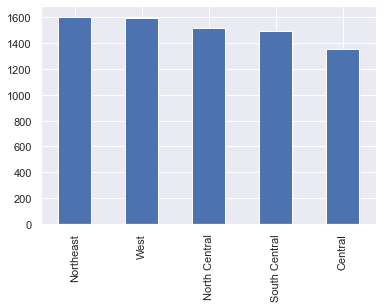

In [48]:
d[d['Drug Prescribed']=='Pentostatin']['Area'].value_counts().plot(kind='bar')
plt.show()

In [44]:
d[d['Drug Prescribed']=='Alemtuzumab']['Area'].value_counts()

Northeast        1686
West             1585
North Central    1516
South Central    1472
Central          1377
Name: Area, dtype: int64

In [45]:
d[d['Drug Prescribed']=='Cyclophosphamide']['Area'].value_counts()

West             1141
North Central    1116
Northeast        1104
South Central    1058
Central          1008
Name: Area, dtype: int64

In [46]:
d[d['Drug Prescribed']=='Fludarabine']['Area'].value_counts()

Northeast        1073
West             1026
North Central    1013
South Central    1013
Central           862
Name: Area, dtype: int64

In [ ]:
d['Physician ID'].value_counts().plot(kind='bar')


<AxesSubplot:>

In [ ]:
plt.show()